# ***Spatial aggregation.***

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Data.csv")
print(data)

          Timestamp                           station  PM2.5        PM10  \
0        2017-01-01        32Bungalows, Bhilai - CECB    NaN         NaN   
1        2017-01-01              AIIMS, Raipur - CECB    NaN         NaN   
2        2017-01-01      Adarsh Nagar, Jaipur - RSPCB    NaN         NaN   
3        2017-01-01        Airoli, Navi Mumbai - MPCB    NaN   54.743723   
4        2017-01-01        Airport Area, Indore - IMC    NaN         NaN   
...             ...                               ...    ...         ...   
1627456  2024-12-10              Worli, Mumbai - MPCB  54.71  124.420000   
1627457  2024-12-10  Yamunapuram, Bulandshahr - UPPCB  53.23  101.340000   
1627458  2024-12-10   Yerramukkapalli, Kadapa - APPCB  75.00  110.750000   
1627459  2024-12-10  Zero Point GICI, Gangtok - SSPCB    NaN         NaN   
1627460  2024-12-10       Zoo Park, Hyderabad - TSPCB  72.83  176.480000   

                                                   address         city  \
0        Bhi

1.Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [83]:
import pandas as pd
data = pd.read_csv("Data.csv")

# Group by state and find average
state_avg = data.groupby("state")["PM2.5"].mean()

# Find the state with the highest average PM2.5 concentration
most_polluted_state = state_avg.idxmax()
highest_avg_pm25 = state_avg.max()

print(f"The state with the highest average concentration is {most_polluted_state} with {highest_avg_pm25:.2f}")


The state with the highest average concentration is Delhi with 104.10


2.Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [84]:
# Convert date column to datetime format
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

#Use only 2023 data
data_2023 = data[data["Timestamp"].dt.year == 2023]

hzd_days = data_2023[data_2023["PM2.5"] > 300]

state_hzd_counts = hzd_days.groupby("state")["Timestamp"].nunique()

most_hzd_state = state_hzd_counts.idxmax()
max_hzd_days = state_hzd_counts.max()

print(f"The state with the most hazardous days in 2023 is {most_hzd_state} with {max_hzd_days} days above 300.")

The state with the most hazardous days in 2023 is Delhi with 49 days above 300.


3.Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [85]:
#We calculate variability by Standard Deviation
state_variability = data_2023.groupby("state")["PM2.5"].std()

most_variable_state = state_variability.idxmax()
highest_variability = state_variability.max()

print(f"The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is {most_variable_state} with a standard deviation of {highest_variability:.2f}.")

The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is Delhi with a standard deviation of 82.80.


4.Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [86]:
#Filter the covid period
data_covid = data[(data["Timestamp"].dt.year >= 2020) & (data["Timestamp"].dt.year <= 2021)]

state_avg_covid = data_covid.groupby("state")["PM2.5"].mean()

least_polluted_state = state_avg_covid.idxmin()
lowest_avg_pm25 = state_avg_covid.min()

print(f"The state with the lowest average PM2.5 levels during the Covid period (2020-2021) is {least_polluted_state} with {lowest_avg_pm25:.2f}.")

The state with the lowest average PM2.5 levels during the Covid period (2020-2021) is Mizoram with 14.32.


# ***Temporal Aggregation.***

1.Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020

In [87]:
# Convert date column to datetime format
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

#data for aug 2020
data_aug_2020 = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]

highest_pm25_station = data_aug_2020.loc[data_aug_2020["PM2.5"].idxmax()]

station_name = highest_pm25_station["station"]
pm25_value = highest_pm25_station["PM2.5"]

print(f"The station that recorded the highest PM2.5 value in August 2020 is {station_name} with {pm25_value:.2f}.")

The station that recorded the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with 805.51.


2.For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [88]:
#data for 2018
data_2018 = data[data["Timestamp"].dt.year == 2018]

station_data = data_2018[data_2018["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]

#Define seasons
winter = station_data[station_data["Timestamp"].dt.month.isin([12, 1, 2])]
summer = station_data[station_data["Timestamp"].dt.month.isin([3, 4, 5])]
monsoon = station_data[station_data["Timestamp"].dt.month.isin([6, 7, 8, 9])]

avg_pm25 = {
    "Winter": winter["PM2.5"].mean(),
    "Summer": summer["PM2.5"].mean(),
    "Monsoon": monsoon["PM2.5"].mean()
}

avg_pm25_df = pd.Series(avg_pm25)

print(avg_pm25_df)

print("The season with the highest pollution in 2018 was", avg_pm25_df.idxmax(), "with value", round(avg_pm25_df.max(),2))

Winter     67.492344
Summer           NaN
Monsoon    34.425196
dtype: float64
The season with the highest pollution in 2018 was Winter with value 67.49


Thought Question:-
A reason for that might be that in winter, temperature inversion traps smoke close to the ground, allowing it to combine with fog and form smog, which then traps particulate matter and worsens air quality. In contrast, during the monsoon, rainfall cleanses the air by capturing and bringing down particulate matter, leading to clearer skies and reduced pollution.

3.Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

<ipython-input-89-b60d875bfdaf>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekday_data = station_data[data["Timestamp"].dt.weekday < 5]
<ipython-input-89-b60d875bfdaf>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekend_data = station_data[data["Timestamp"].dt.weekday >= 5]


Monthly Weekday Average:
    Month      PM2.5
0      1  69.115419
1      2  62.541201
2      3  51.942440
3      4  38.790324
4      5  14.986212
5      6   9.534043
6      7   7.769066
7     10  55.484170
8     11  48.326451
9     12  74.505459
Monthly Weekend Average:
    Month      PM2.5
0      1  52.131611
1      2  53.946216
2      3  53.167747
3      4  41.405150
4      5  17.104372
5      6   7.695810
6      7   8.652231
7     10  62.974510
8     11  42.091224
9     12  88.985127


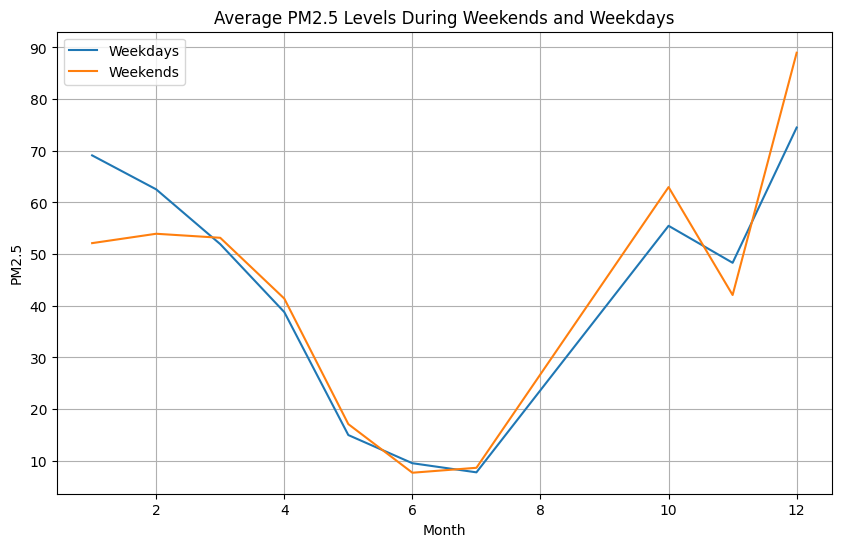

In [89]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

data_2021 = data[data["Timestamp"].dt.year == 2021]



# Drop missing PM2.5 values
data_2021 = data_2021.dropna(subset=["PM2.5"])



station_data = data_2021[data_2021["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]

weekday_data = station_data[data["Timestamp"].dt.weekday < 5]
weekend_data = station_data[data["Timestamp"].dt.weekday >= 5]

monthly_weekday_average = weekday_data.groupby(weekday_data["Timestamp"].dt.month)["PM2.5"].mean()
monthly_weekend_average = weekend_data.groupby(weekend_data["Timestamp"].dt.month)["PM2.5"].mean()

print("Monthly Weekday Average:\n",pd.DataFrame({"Month": monthly_weekday_average.index, "PM2.5": monthly_weekday_average.values}))
print("Monthly Weekend Average:\n",pd.DataFrame({"Month": monthly_weekend_average.index, "PM2.5": monthly_weekend_average.values}))

#Plot Data
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(monthly_weekday_average.index, monthly_weekday_average.values, label="Weekdays")
ax.plot(monthly_weekend_average.index, monthly_weekend_average.values, label="Weekends")
ax.set_xlabel("Month")
ax.set_ylabel("PM2.5")
ax.set_title("Average PM2.5 Levels During Weekends and Weekdays")
ax.grid(True)
ax.legend()
plt.show()

# ***Spatio-temporal Aggregation***

1.For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [90]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data_2022 = data[data['Timestamp'].dt.year == 2022]

data_2022['Month'] = data_2022['Timestamp'].dt.month

# Define summer and monsoon
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

summer_avg = data_2022[data_2022['Month'].isin(summer_months)].groupby('state')['PM2.5'].mean()
monsoon_avg = data_2022[data_2022['Month'].isin(monsoon_months)].groupby('state')['PM2.5'].mean()

seasonal_avg = pd.DataFrame({'Summer': summer_avg, 'Monsoon': monsoon_avg})

# Calculate percentage change
seasonal_avg['Percentage Change'] = ((seasonal_avg['Monsoon'] - seasonal_avg['Summer']) / seasonal_avg['Summer']) * 100
print(seasonal_avg)

# Identify the state with the most difference (absolute value)
most_diff_state = seasonal_avg['Percentage Change'].abs().idxmax()
most_diff_value = seasonal_avg.loc[most_diff_state, 'Percentage Change']

# Display the result
print(f"The state with the most difference in PM2.5 levels between monsoon and summer in 2022 is {most_diff_state} with a percentage change of {most_diff_value:.2f}%.")

                      Summer    Monsoon  Percentage Change
state                                                     
Andhra Pradesh     30.128540  19.355510         -35.756894
Arunachal Pradesh  32.116292  15.069892         -53.077110
Assam              56.337647  21.872292         -61.176419
Bihar              75.834868  35.642356         -53.000042
Chandigarh         59.695914  32.758585         -45.124242
Chhattisgarh       22.321561  19.871696         -10.975330
Delhi              95.667628  42.769572         -55.293579
Gujarat            65.113078  35.852728         -44.937747
Haryana            81.727661  41.922458         -48.704688
Himachal Pradesh   61.471943  38.686133         -37.067008
Jammu and Kashmir  18.050196  18.049643          -0.003063
Jharkhand                NaN        NaN                NaN
Karnataka          33.387814  16.527449         -50.498558
Kerala             33.849203  28.852892         -14.760499
Madhya Pradesh     51.369364  22.473271         -56.2516

<ipython-input-90-653b07fa02e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['Month'] = data_2022['Timestamp'].dt.month


2.Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


<ipython-input-91-e2394e3667b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Year'] = delhi_data['Timestamp'].dt.year
<ipython-input-91-e2394e3667b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month
<ipython-input-91-e2394e3667b0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

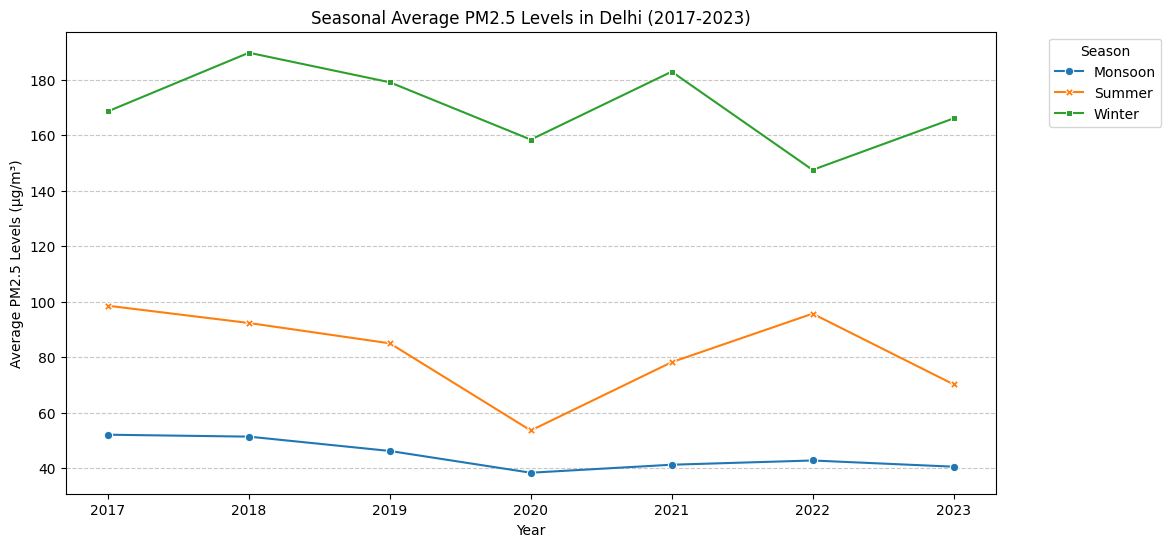

In [91]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter data for Delhi and the required years
delhi_data = data[(data['state'] == 'Delhi') & (data['Timestamp'].dt.year >= 2017) & (data['Timestamp'].dt.year <= 2023)]

# Extract Year and Month
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month

# Define Seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return None  # Exclude October and November

# Classify data into seasons
delhi_data['Season'] = delhi_data['Month'].apply(get_season)
delhi_data = delhi_data.dropna(subset=['Season'])

# Calculate seasonal averages
seasonal_avg = delhi_data.groupby(['Year', 'Season'])['PM2.5'].mean().reset_index()

# Pivot the data for plotting
seasonal_pivot = seasonal_avg.pivot(index='Year', columns='Season', values='PM2.5')

# Plotting the time series for each season
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_pivot, markers=True, dashes=False)
plt.title('Seasonal Average PM2.5 Levels in Delhi (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3.Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)



,PM2.5
Timestamp,
2017,130.857720
2018,113.206232
2019,108.578564
2020,95.639458
2021,105.401629
2022,99.017342
2023,102.183923


,PM2.5
Timestamp,
2017,43.246625
2018,35.005524
2019,34.911579
2020,42.301223
2021,47.642947
2022,49.372228
2023,49.640018


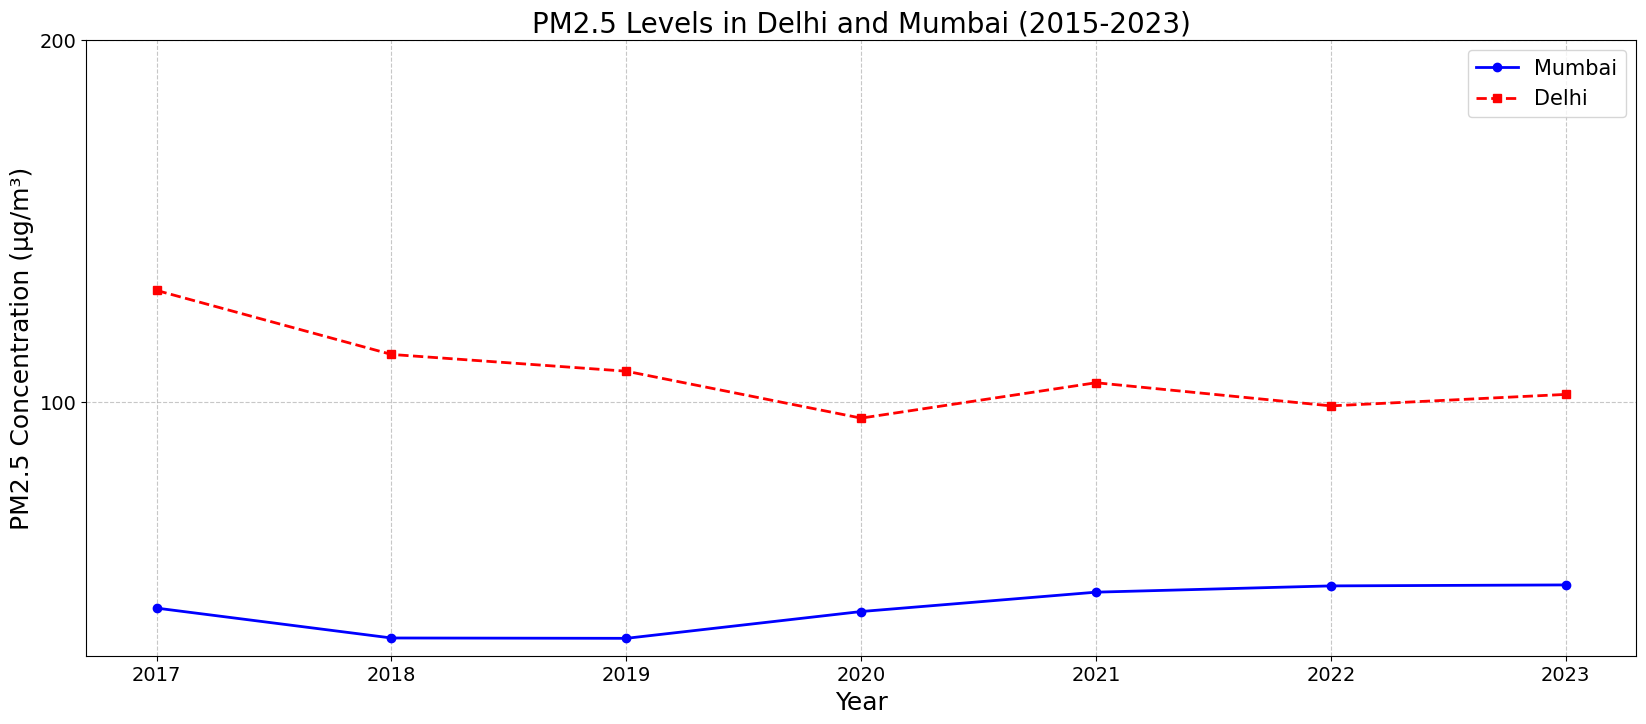

The fluctuation in Mumbai: 6.27
The fluctuation in Delhi: 11.72
The city with more fluctuation is: Delhi


In [92]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter data for the period 2015-2023
data_filtered = data[data['Timestamp'].dt.year <= 2023]

# Group by year and city, then compute the mean PM2.5 levels
delhi_data = data_filtered[data_filtered['city'] == 'Delhi'].groupby(data_filtered['Timestamp'].dt.year)['PM2.5'].mean()
mumbai_data = data_filtered[data_filtered['city'] == 'Mumbai'].groupby(data_filtered['Timestamp'].dt.year)['PM2.5'].mean()

# Display the computed averages
display(delhi_data, mumbai_data)

# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(mumbai_data.index, mumbai_data.values, marker='o', linestyle='-', label='Mumbai', linewidth=2, color='blue')
ax.plot(delhi_data.index, delhi_data.values, marker='s', linestyle='--', label='Delhi', linewidth=2, color='red')

# Grid and labels
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=15)
ax.set_xticks(delhi_data.index)  # Set x-ticks based on the actual year values
ax.set_xticklabels(delhi_data.index.astype(str), fontsize=14)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=18)
ax.set_yticks(np.arange(100, max(delhi_data.max(), mumbai_data.max()) + 100, 100))
ax.tick_params(axis='y', labelsize=14)
ax.set_title('PM2.5 Levels in Delhi and Mumbai (2015-2023)', fontsize=20)

# Show plot
plt.show()

# Calculate standard deviations (fluctuations)
delhi_fluc = delhi_data.std()
mumbai_fluc = mumbai_data.std()

# Print fluctuation results
print(f"The fluctuation in Mumbai: {mumbai_fluc:.2f}")
print(f"The fluctuation in Delhi: {delhi_fluc:.2f}")

# Determine which city has more fluctuation
city_with_more_fluc = 'Mumbai' if mumbai_fluc > delhi_fluc else 'Delhi'
print(f"The city with more fluctuation is: {city_with_more_fluc}")

# ***Population Based***

1.Which state in India has the highest number of monitoring stations relative to its population?

In [111]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
stations= data.groupby("state")["station"].nunique()
state_data=state_data.sort_values('State')
highest_num_of_stations=stations.values/state_data['Population']
max_value_index= highest_num_of_stations.idxmax()
print('State with highest number of monitoring station relative to its population:',state_data.loc[max_value_index]['State'])

State with highest number of monitoring station relative to its population: Chandigarh


2.Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

Text(0, 0.5, 'PM2.5 exposure per capita in 2023')

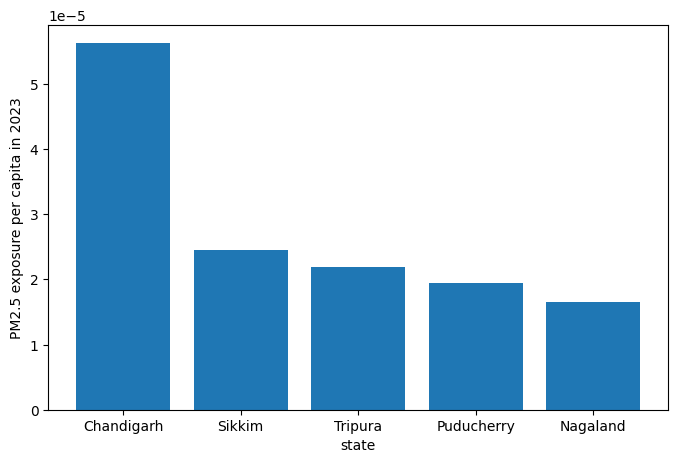

In [113]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
year= pd.to_datetime(data['Timestamp']).dt.year
data_2023= data.loc[year==2023]
avg_pm_levels=data_2023.groupby('state')['PM2.5'].mean()
state_data=state_data.set_index('State')
pm_per_capita=avg_pm_levels/state_data['Population']
top5_state=pm_per_capita.sort_values(ascending=False).head(5)

fig,ax=plt.subplots(figsize=(8,5))
ax.bar(top5_state.index,top5_state.values)
ax.set_xlabel('state')
ax.set_ylabel('PM2.5 exposure per capita in 2023')

3.Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.


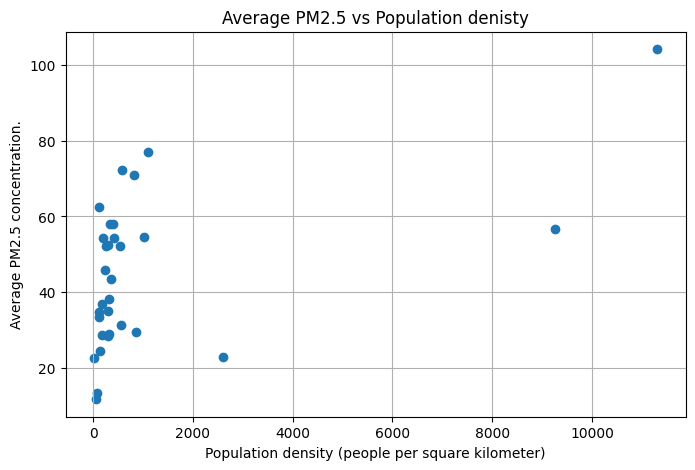

In [114]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
state_data=state_data.sort_values('State')
avg_pm_levels=data.groupby('state')['PM2.5'].mean()
population_density=state_data['Population']/state_data['Area (km2)']
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(population_density,avg_pm_levels)
ax.set_xlabel("Population density (people per square kilometer)")
ax.set_ylabel("Average PM2.5 concentration.")
ax.set_title("Average PM2.5 vs Population denisty")
ax.grid(True)

# **Area Based**

1.Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


State with highest PM2.5 concentration per square kilometer: Chandigarh


Text(0, 0.5, 'PM2.5 concentration per square kilometer')

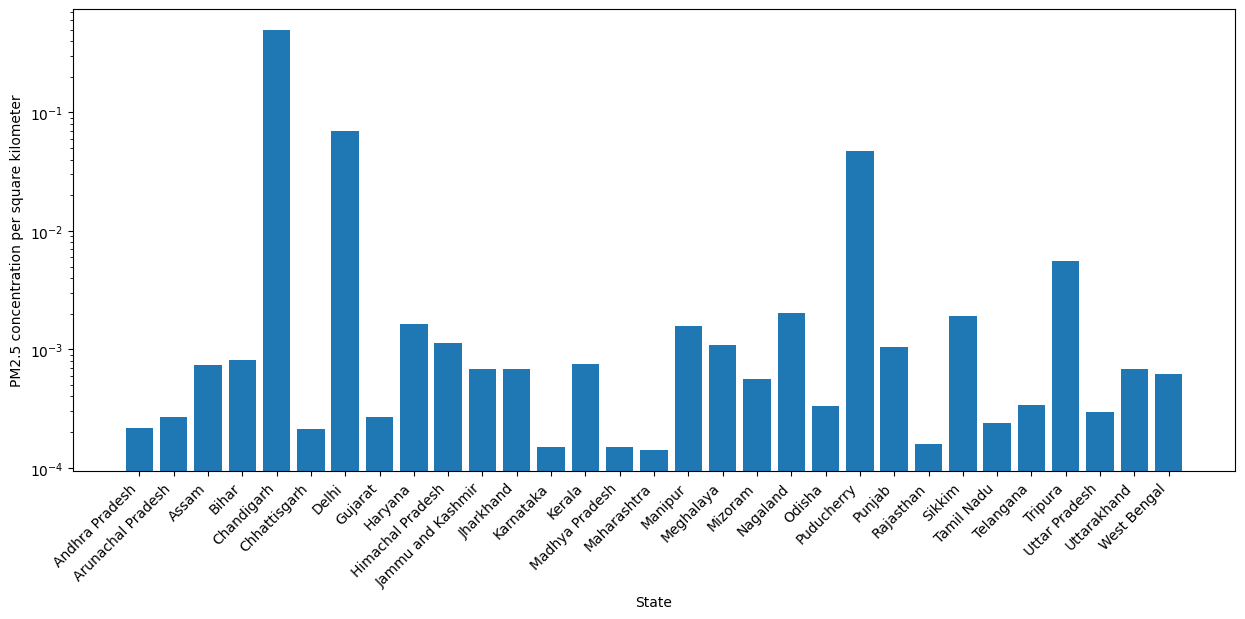

In [103]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
state_data=state_data.sort_values('State')
avg_pm_levels=data.groupby('state')['PM2.5'].mean()
state_data=state_data.set_index('State')
pm_conc_per_sqkm=avg_pm_levels/state_data['Area (km2)']
highest_pm_level_state=pm_conc_per_sqkm.idxmax()
print('State with highest PM2.5 concentration per square kilometer:',highest_pm_level_state)
fig,ax=plt.subplots(figsize=(15,6))
ax.set_xticks(np.arange(0,len(pm_conc_per_sqkm.index)))
ax.set_xticklabels(pm_conc_per_sqkm.index, rotation=45, ha="right")
ax.set_yscale("log")
ax.bar(pm_conc_per_sqkm.index,pm_conc_per_sqkm)
ax.set_xlabel("State")
ax.set_ylabel("PM2.5 concentration per square kilometer")

2.Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

State with highest density of monitoring stations: Delhi


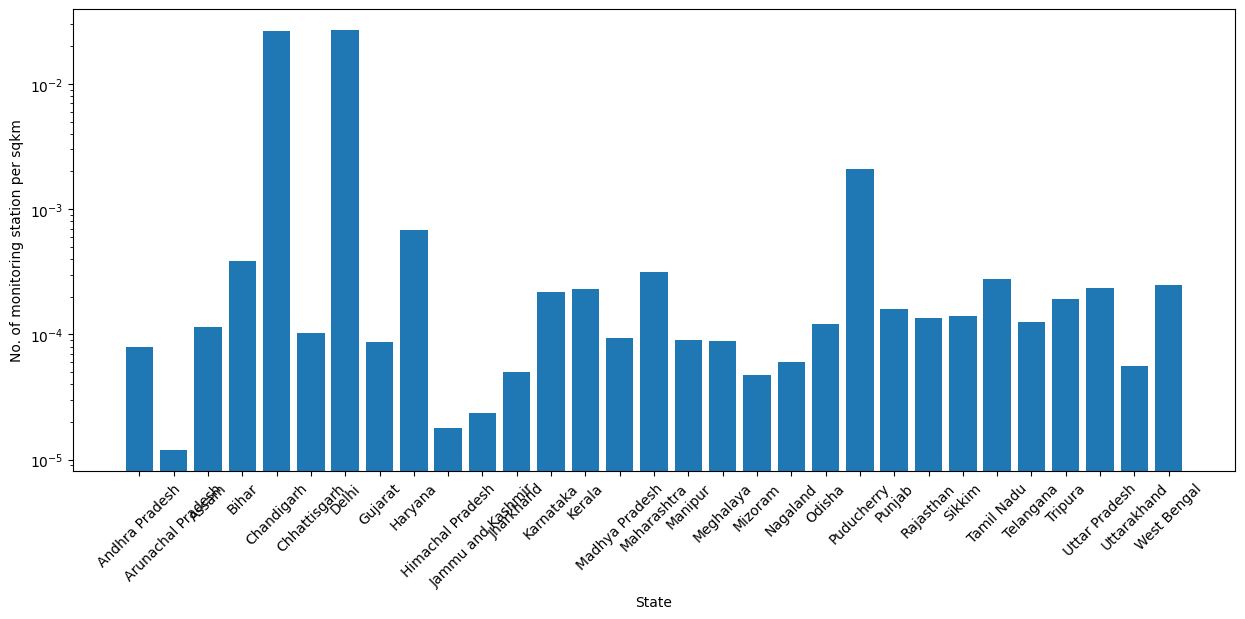

In [105]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
state_data=state_data.sort_values('State')
state_data=state_data.set_index('State')
stations=data.groupby("state")["station"].nunique()
stations_per_sqkm=stations/state_data['Area (km2)']
highest_density_of_monitoring_stations=stations_per_sqkm.idxmax()
print('State with highest density of monitoring stations:',highest_density_of_monitoring_stations)

fig,ax=plt.subplots(figsize=(15,6))
ax.bar(stations_per_sqkm.index,stations_per_sqkm.values)
ax.set_xticks(np.arange(0,len(stations_per_sqkm)))
ax.set_xticklabels(stations_per_sqkm.index,rotation=45)
ax.set_yscale("log")
ax.set_xlabel('State')
ax.set_ylabel('No. of monitoring station per sqkm')
plt.show()

3.Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [109]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
year= pd.to_datetime(data['Timestamp']).dt.year
mh=data[data['state']=='Maharashtra'].loc[year==2021]
mp=data[data['state']=='Madhya Pradesh'].loc[year==2021]
mh_pm=mh['PM2.5'].mean()
mp_pm=mp['PM2.5'].mean()

state_data=state_data.set_index('State')
mh_data=state_data.loc['Maharashtra']
mp_data=state_data.loc['Madhya Pradesh']
density_mh=mh_data['Population']/mh_data['Area (km2)']
density_mp=mp_data['Population']/mp_data['Area (km2)']

df=pd.DataFrame({'State':['Maharashtra','Madhya Pradesh'],
                 'Population Density':[density_mh,density_mp],
                 'Average PM2.5':[mh_pm,mp_pm]}).set_index('State')
max_pm_state=df['Average PM2.5'].idxmax()
max_pd_state=df['Population Density'].idxmax()
print(df)
print("State with higher PM2.5 levels:",max_pm_state)
print("State with higher population density:",max_pd_state)

                Population Density  Average PM2.5
State                                            
Maharashtra             365.192023      46.440044
Madhya Pradesh          235.608557      47.095952
State with higher PM2.5 levels: Madhya Pradesh
State with higher population density: Maharashtra


The table shows that despite a decrease in population density, pollution levels still rise. This suggests **little correlation** between the two variables. Although it's commonly assumed that higher population density would lead to increased pollution, this data indicates that **other factors** significantly influence pollution levels. This highlights the complexity of pollution dynamics and suggests that population density alone **does not determine air quality**.

# ***Funding Based***

In [93]:
fund_data=pd.read_csv('NCAP_Funding.csv')
fund_data

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


1.Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [94]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
pm25_2021 = data[data['Timestamp'].dt.year == 2021]
fund_data['Amount released during FY 2021-22'] = pd.to_numeric(fund_data['Amount released during FY 2021-22'], errors='coerce')
ncap_states = fund_data[fund_data['Amount released during FY 2021-22'] > 0]['State'].unique()
pm25_2021['NCAP'] = pm25_2021['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')
avg_pm25 = pm25_2021.groupby('NCAP')['PM2.5'].mean()
print(avg_pm25)

NCAP
Funded        65.352193
Not Funded    55.346279
Name: PM2.5, dtype: float64


<ipython-input-94-be1dcb47635c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_2021['NCAP'] = pm25_2021['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')


2.Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

<ipython-input-95-84b740daabb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Timestamp'] = pd.to_datetime(assam_data['Timestamp'])
<ipython-input-95-84b740daabb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Year']=assam_data['Timestamp'].dt.year


<Figure size 1000x600 with 0 Axes>

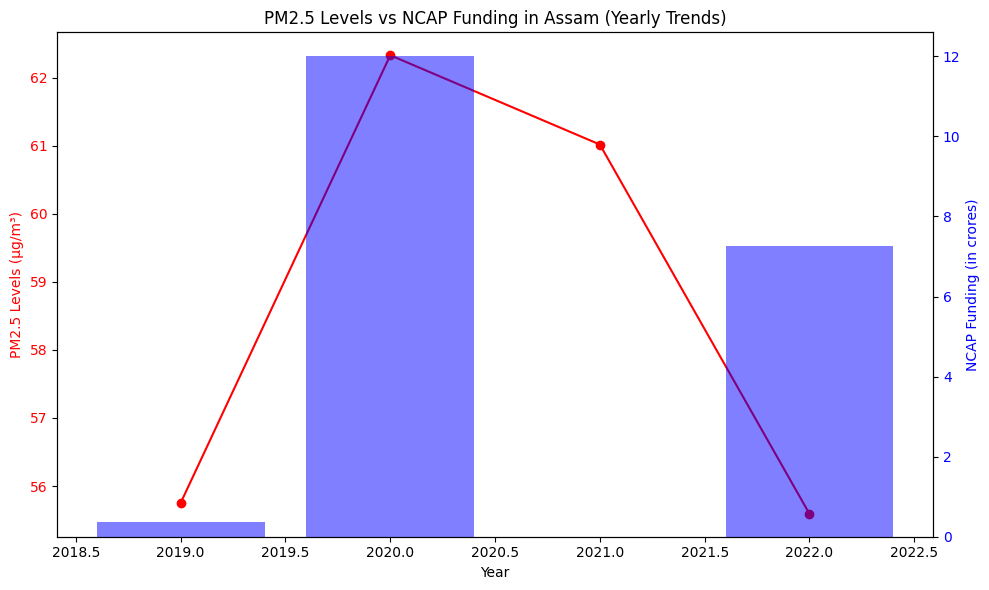

In [95]:
# Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?
assam_data=data[data['state']=='Assam']
assam_data['Timestamp'] = pd.to_datetime(assam_data['Timestamp'])
assam_data['Year']=assam_data['Timestamp'].dt.year
pm_25_yearly=assam_data.groupby('Year')['PM2.5'].mean().reset_index()

fund_data.replace('-',0,inplace=True)
assam_funding=fund_data[fund_data['State']=='Assam']
assam_funding = assam_funding.melt(id_vars=["State"], var_name="Year", value_name="Funding")

# Convert Year to integer
assam_funding["Year"] = assam_funding["Year"].str.extract("(\d{4})").astype(float)
final_data = pd.merge(pm_25_yearly, assam_funding, on="Year", how="inner")
final_data['Funding'] = final_data['Funding'].astype(float)
final_data=final_data.groupby('Year').agg({'PM2.5':'mean','Funding':'sum'}).reset_index()

# Create a time series plot
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels
ax1.plot(final_data["Year"], final_data["PM2.5"], color="red", marker="o", label="Avg PM2.5")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 Levels (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create second y-axis for funding
ax2 = ax1.twinx()
ax2.bar(final_data["Year"], final_data["Funding"], alpha=0.5, color="blue", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (in crores)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Title and legends
plt.title("PM2.5 Levels vs NCAP Funding in Assam (Yearly Trends)")
fig.tight_layout()
plt.show()

3.Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


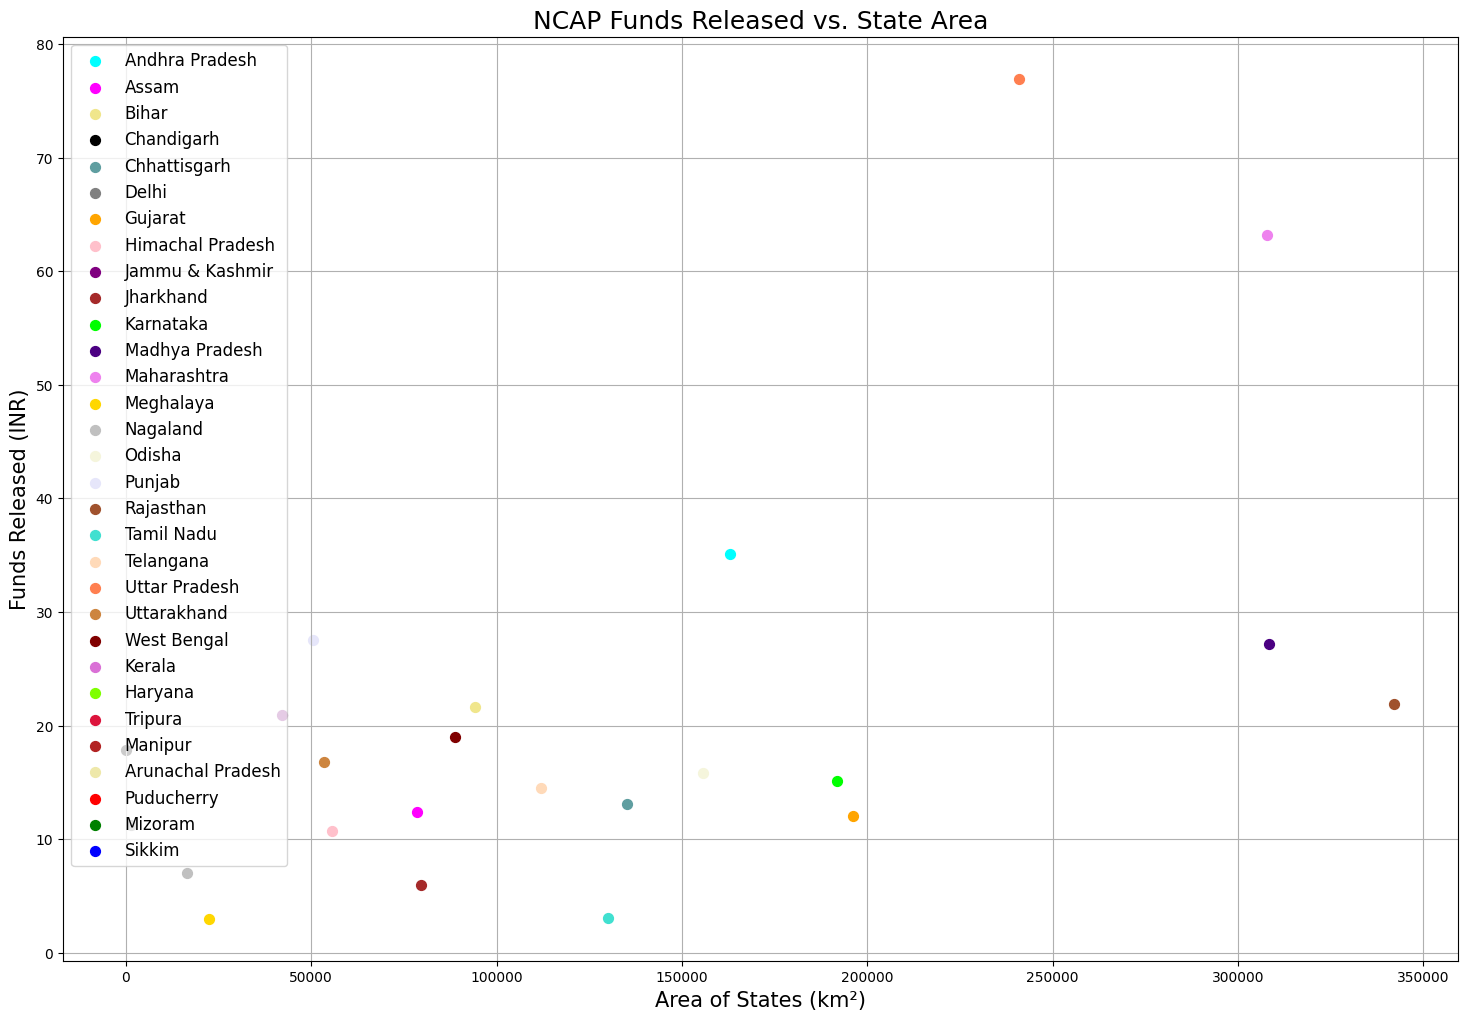

Total states plotted: 31


In [96]:
NCAP_funding = pd.read_csv('NCAP_Funding.csv')
State_data = pd.read_csv('State_data.csv')

total_funding = NCAP_funding.groupby('State')['Total fund released'].sum()

state_area = State_data.set_index('State')['Area (km2)']

df_data = pd.concat([total_funding, state_area], axis=1)

df_data = df_data.drop(index='Jammu and Kashmir', errors='ignore')  # Avoid errors if it doesn't exist
df_data.loc['Jammu & Kashmir'] = [total_funding.get('Jammu & Kashmir', 0), 42241]

total_fund_released = df_data['Total fund released']
area_km2 = df_data['Area (km2)']

# Define colors for scatter plot
colors = [
    'cyan', 'magenta','khaki', 'black', 'cadetblue',
    'gray', 'orange', 'pink', 'purple', 'brown', 'lime', 'indigo', 'violet',
    'gold', 'silver', 'beige', 'lavender','sienna', 'turquoise', 'peachpuff', 'coral',
    'peru' , 'maroon', 'orchid', 'chartreuse', 'crimson', 'firebrick', 'palegoldenrod','red','green','blue'
]

fig, ax = plt.subplots(figsize=(18, 12))
for i, state in enumerate(df_data.index):
    ax.scatter(area_km2.loc[state], total_fund_released.loc[state], c=colors[i % len(colors)], s=50, label=state)

ax.grid()
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Area of States (km²)', fontsize=15)
ax.set_ylabel('Funds Released (INR)', fontsize=15)
ax.set_title('NCAP Funds Released vs. State Area', fontsize=18)

plt.show()

print(f"Total states plotted: {len(df_data)}")


# ***Miscellaneous Questions***

1.For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [97]:
data = pd.read_csv("Data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_2023 = data[data['Timestamp'].dt.year == 2023]
city_avg_pm_25=data_2023.groupby('city')['PM2.5'].mean()
most_polluted_city=city_avg_pm_25.idxmax()
if pd.notna(most_polluted_city):
  polluted_city_data=data_2023[data_2023['city']==most_polluted_city]
  days_above_threshold=len(polluted_city_data[polluted_city_data['PM2.5']>300])
  percentage_days_above_threshold=(days_above_threshold/len(polluted_city_data))*100
print(percentage_days_above_threshold)

0.821917808219178


2.Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

<ipython-input-98-47b1f96f5e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year']=data['Timestamp'].dt.year
<ipython-input-98-47b1f96f5e20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Timestamp"].dt.month
<ipython-input-98-47b1f96f5e20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

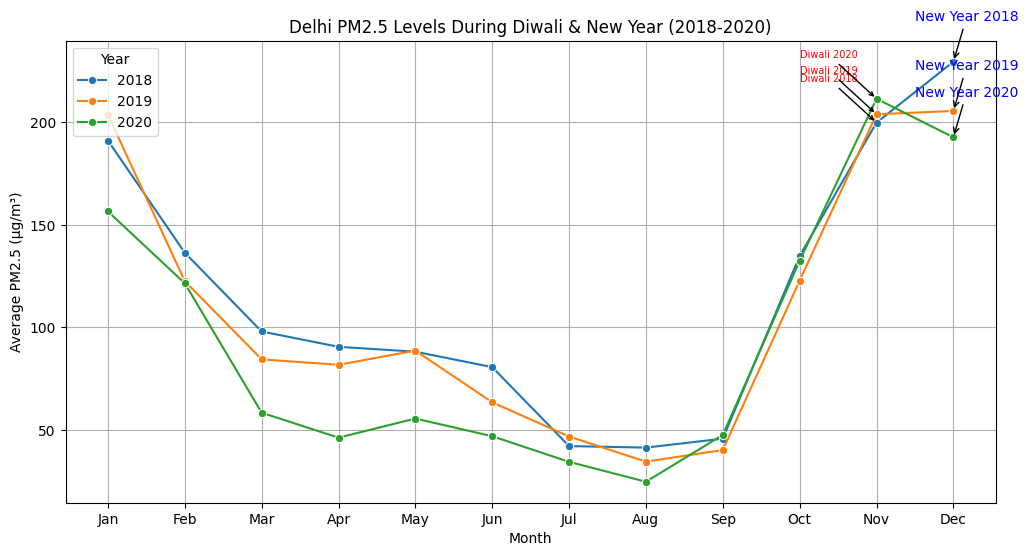

In [98]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data[(data['Timestamp'].dt.year==2018)|(data['Timestamp'].dt.year==2019)|(data['Timestamp'].dt.year==2020)]
data['Year']=data['Timestamp'].dt.year
data["Month"] = data["Timestamp"].dt.month

# Create a column to mark festival and non-festival months
delhi_data=data[data['state']=='Delhi']
delhi_data["Festival"] = delhi_data["Month"].apply(lambda x:
    "Diwali" if x in [10, 11] else
    "New Year" if x in [12, 1] else "Regular"
)
monthly_pm25 = delhi_data.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pm25, x="Month", y="PM2.5", hue="Year", marker="o", palette="tab10")

# Mark the festival months with arrows
for year in [2018, 2019, 2020]:
    diwali_peak = monthly_pm25[(monthly_pm25["Year"] == year) & (monthly_pm25["Month"].isin([10, 11]))]["PM2.5"].max()
    newyear_peak = monthly_pm25[(monthly_pm25["Year"] == year) & (monthly_pm25["Month"].isin([12, 1]))]["PM2.5"].max()
    diwali_peak_month = monthly_pm25.loc[
        (monthly_pm25["Year"] == year) & (monthly_pm25["PM2.5"] == diwali_peak), "Month"
    ].values[0]
    newyear_peak_month = monthly_pm25.loc[
        (monthly_pm25["Year"] == year) & (monthly_pm25["PM2.5"] == newyear_peak), "Month"
    ].values[0]


    plt.annotate(f'Diwali {year}',
                 xy=(diwali_peak_month, diwali_peak),
                 xytext=(diwali_peak_month - 1, diwali_peak + 20),
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 fontsize=7, color="red")

    plt.annotate(f'New Year {year}',
                 xy=(newyear_peak_month, newyear_peak),
                 xytext=(newyear_peak_month - 0.5, newyear_peak + 20),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'),
                 fontsize=10, color="blue")

# Formatting
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Delhi PM2.5 Levels During Diwali & New Year (2018-2020)")
plt.legend(title="Year", loc="upper left")
plt.grid()
plt.show()

3.Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

State with highest NCAP funding in 2020: Assam with a funding of 5.0


<ipython-input-99-d30b9720dbe7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])
<ipython-input-99-d30b9720dbe7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Year'] = state_data['Timestamp'].dt.year


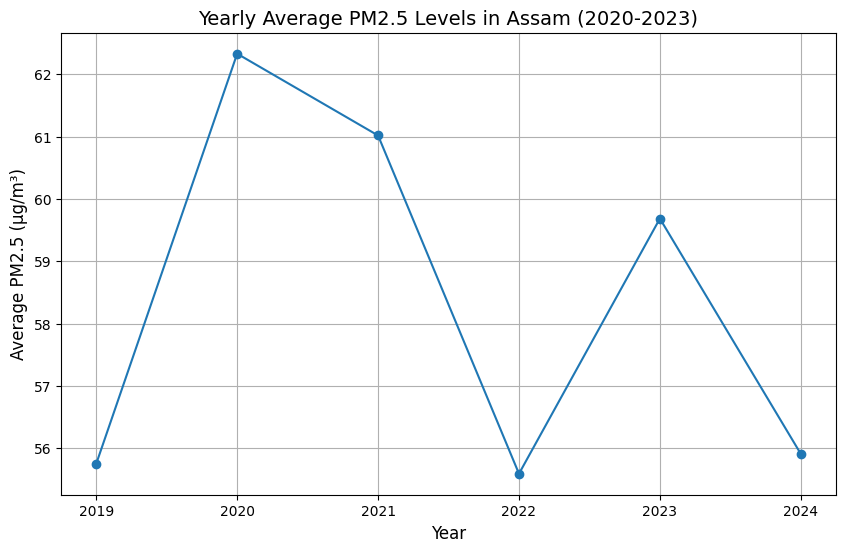

In [99]:
data=pd.read_csv("Data.csv")
fund_data=pd.read_csv("NCAP_Funding.csv")

fund_2020 = fund_data[['State', 'Amount released during FY 2020-21']]


fund_2020 = fund_2020.rename(columns={'Amount released during FY 2020-21': 'Funding_2020'})

fund_2020['Funding_2020'] = pd.to_numeric(fund_2020['Funding_2020'], errors='coerce')

# Get the state with the maximum funding
state_highest_funding = fund_2020.loc[fund_2020['Funding_2020'].idxmax()]

state = state_highest_funding['State']
funding = state_highest_funding['Funding_2020']
print(f"State with highest NCAP funding in 2020: {state} with a funding of {funding}")

state_data = data[data['state'] == state]

state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])

state_data['Year'] = state_data['Timestamp'].dt.year

# Calculate the yearly average PM2.5 levels
yearly_avg_pm25 = state_data.groupby('Year')['PM2.5'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='o')
plt.title(f'Yearly Average PM2.5 Levels in {state} (2020-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()

4.Draw the map of India and plot the sensor locations on the map.

In [100]:
!pip install wget

--2025-02-18 16:43:55--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.191.129, 52.92.180.49, 52.92.196.57, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.191.129|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘ne_110m_admin_0_countries.zip’ not modified on server. Omitting download.

Archive:  ne_110m_admin_0_countries.zip


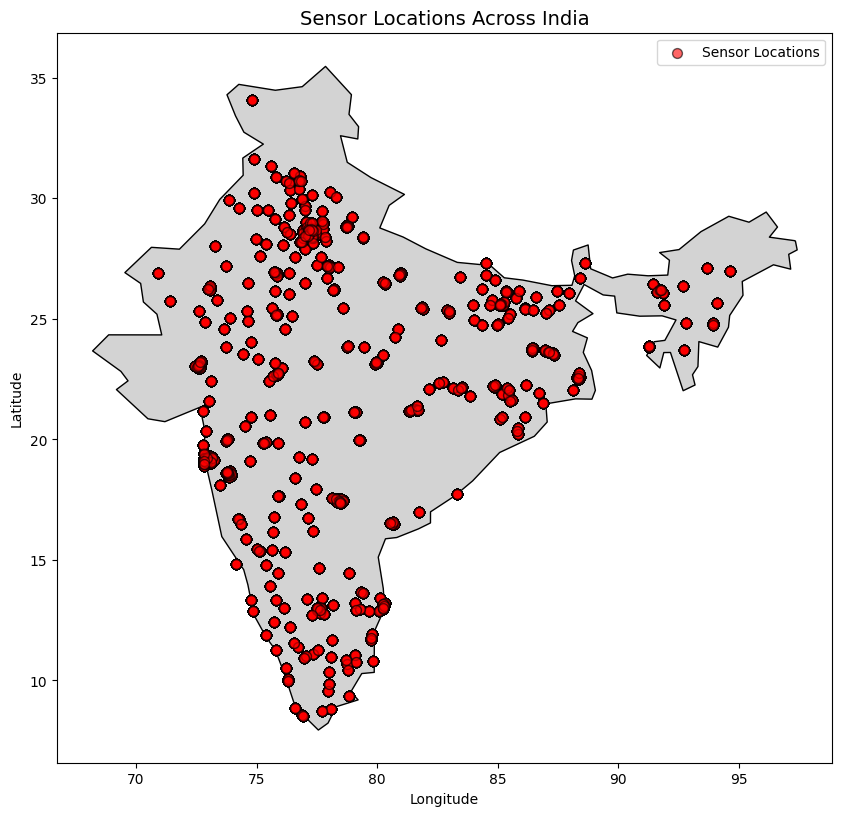

In [101]:
import geopandas as gpd
import wget

!wget -N https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip -n ne_110m_admin_0_countries.zip

world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Filter for India
india = world[world.ADMIN== "India"]

sensor_data=pd.read_csv("Data.csv")

sensor_gdf = gpd.GeoDataFrame(sensor_data,
                              geometry=gpd.points_from_xy(sensor_data["longitude"], sensor_data["latitude"]))

fig, ax = plt.subplots(figsize=(10, 12))
india.plot(ax=ax, color='lightgrey', edgecolor='black')

sensor_gdf.plot(ax=ax, markersize=50, color='red', alpha=0.6, edgecolor="black", label="Sensor Locations")

plt.title("Sensor Locations Across India", fontsize=14)
plt.legend(loc="upper right")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

# **Tell Us Something New**

Our analysis revealed that **states receiving NCAP funding had significantly higher average PM2.5 levels than non-funded states**, which is unexpected since funding is meant to reduce pollution. This raises concerns about the **effective utilization of funds**, urging policymakers to investigate and ensure transparent and impactful spending. Additionally, we noticed that **PM10 levels were not analyzed** despite being a major pollutant linked to sources like construction dust and having serious health implications. Future studies should **compare PM2.5 and PM10 trends** and assess seasonal variations to better understand pollution sources. The Image is uploaded as a proof. 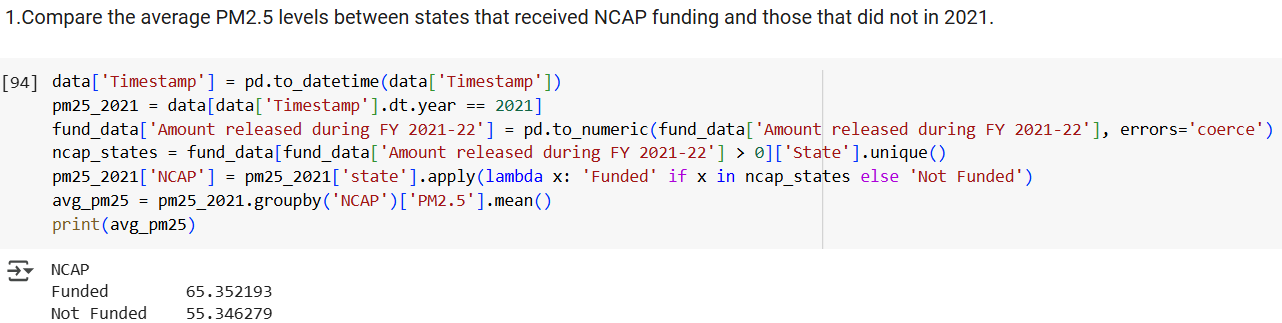